In [1]:
## Download Code
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv("train_1.csv", nrows = 1000)
# train = train.fillna(0.)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

np.random.seed(7)

Using TensorFlow backend.


In [57]:
# from __future__ import print_function

# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Embedding
# from keras.layers import LSTM
# # from keras.datasets import imdb

In [58]:
# def smape(y_true, y_pred):
#     denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
#     diff = np.abs(y_true - y_pred) / denominator
#     diff[denominator == 0] = 0.0
#     return np.nanmean(diff)

In [73]:
from keras import backend as K

def smape(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true) + K.abs(y_pred),
                                            K.epsilon(),
                                            None))
    return 200. * K.mean(diff, axis=-1)

In [59]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [60]:
train = train.fillna(0.0)

In [61]:
train = train.iloc[:, -55:]

In [62]:
train = train.values.astype('float32')

In [63]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

In [64]:
train.shape

(1000, 55)

In [65]:
X_train, Y_train = train[:, -55:-10], train[:, -10:-5]

In [66]:
X_test, Y_test = train[:, -50: -5], train[:, -5:]

In [67]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1000, 45), (1000, 5), (1000, 45), (1000, 5))

In [54]:
## 前45天预测后边5天
## train_X -55: -10, train_Y -10: -5
## test_X -50: -5, test_Y -5: 

In [68]:
X_train = X_train.reshape(1000, 45, 1)
X_test = X_test.reshape(1000, 45, 1)

In [76]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(5))
# model.compile(loss='mean_absolute_error', optimizer='adam')
model.compile(loss=smape, optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=128, verbose=2, validation_data=(X_test, Y_test))

Train on 1000 samples, validate on 1000 samples
Epoch 1/100
4s - loss: 123.3127 - val_loss: 111.8460
Epoch 2/100
3s - loss: 113.8853 - val_loss: 97.1966
Epoch 3/100
3s - loss: 107.5656 - val_loss: 95.2392
Epoch 4/100
3s - loss: 95.2601 - val_loss: 76.9383
Epoch 5/100
3s - loss: 85.8142 - val_loss: 70.3522
Epoch 6/100
3s - loss: 72.9053 - val_loss: 62.8276
Epoch 7/100
3s - loss: 67.1683 - val_loss: 57.6879
Epoch 8/100
3s - loss: 62.1233 - val_loss: 57.8354
Epoch 9/100
3s - loss: 58.8974 - val_loss: 55.5892
Epoch 10/100
3s - loss: 56.9269 - val_loss: 53.0888
Epoch 11/100
3s - loss: 55.3008 - val_loss: 52.2839
Epoch 12/100
3s - loss: 54.6315 - val_loss: 56.3422
Epoch 13/100
3s - loss: 67.2649 - val_loss: 64.2489
Epoch 14/100
3s - loss: 63.7109 - val_loss: 50.5632
Epoch 15/100
3s - loss: 59.3735 - val_loss: 56.5765
Epoch 16/100
3s - loss: 57.2250 - val_loss: 48.5331
Epoch 17/100
3s - loss: 53.5069 - val_loss: 54.8335
Epoch 18/100
3s - loss: 50.3339 - val_loss: 45.9183
Epoch 19/100
3s - los

KeyboardInterrupt: 

In [82]:
look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [83]:
trainX.shape, trainY.shape

((42, 1), (42,))

In [84]:
testX[0]

array([ 0.07070707], dtype=float32)

In [85]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [57]:
trainX.shape, testX.shape

((42, 1, 1), (3, 1, 1))

In [89]:
testX

array([[[ 0.07070707]],

       [[ 0.08080808]],

       [[ 0.06565657]]], dtype=float32)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

np.random.seed(7)

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

dataframe = pd.read_csv('../input/traininggoogleprices/TrainPrices.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(128,activation='relu', input_shape=(1, look_back), return_sequences=False))
# model.add(LSTM(128,activation='tanh', input_shape=(1, look_back),return_sequences=False))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_absolute_percentage_error', optimizer='RMSProp', metrics = ['accuracy', smape])
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import math
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

# np.random.seed(7)

# def create_dataset(dataset, look_back=1):
#     dataX, dataY = [], []
#     for i in range(len(dataset)-look_back-1):
#         a = dataset[i:(i+look_back), 0]
#         dataX.append(a)
#         dataY.append(dataset[i + look_back, 0])
#     return np.array(dataX), np.array(dataY)

# dataframe = pd.read_csv('../input/traininggoogleprices/TrainPrices.csv', usecols=[1])
# dataset = dataframe.values
# dataset = dataset.astype('float32')
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)

# train_size = int(len(dataset) * 0.9)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# look_back=1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# # reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(128,activation='tanh', input_shape=(1, look_back), return_sequences=True))
# model.add(LSTM(128,activation='tanh', input_shape=(1, look_back),return_sequences=False))
# model.add(Dense(1, activation='relu'))
# model.compile(loss='mse', optimizer='RMSProp', metrics = ['accuracy'])
# model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)

# # make predictions
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
# # invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

# # calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

In [ ]:
epochs  = 1
seq_len = 50

print('> Loading data... ')

X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', seq_len, True)

print('> Data Loaded. Compiling...')

model = lstm.build_model([1, 50, 100, 1])

model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=epochs,
    validation_split=0.05)

predicted = lstm.predict_point_by_point(model, X_test)

In [1]:
import os
import time
import warnings
import numpy as np
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #Hide messy TensorFlow warnings
warnings.filterwarnings("ignore") #Hide messy Numpy warnings

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'rb').read()
    data = f.decode().split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print("> Compilation Time : ", time.time() - start)
    return model

def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

Using TensorFlow backend.


In [2]:
import lstm
import time
import matplotlib.pyplot as plt

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

#Main Run Thread
if __name__=='__main__':
	global_start_time = time.time()
	epochs  = 1
	seq_len = 50

	print('> Loading data... ')

	X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', seq_len, True)

	print('> Data Loaded. Compiling...')

	model = lstm.build_model([1, 50, 100, 1])

	model.fit(
	    X_train,
	    y_train,
	    batch_size=512,
	    nb_epoch=epochs,
	    validation_split=0.05)

	predictions = lstm.predict_sequences_multiple(model, X_test, seq_len, 50)
	#predicted = lstm.predict_sequence_full(model, X_test, seq_len)
	#predicted = lstm.predict_point_by_point(model, X_test)        

	print('Training duration (s) : ', time.time() - global_start_time)
	plot_results_multiple(predictions, y_test, 50)


ImportError: No module named lstm

In [6]:
# Time Series Testing 
import keras.callbacks
from keras.models import Sequential  
from keras.layers.core import Dense, Activation, Dense, Dropout
from keras.layers.recurrent import LSTM

# Call back to capture losses 
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
# You should get data frames with prices somewhere, e.g. on Quandl - implementation is up to you
# merge data frames
merged = df1.merge(df2, left_index=True, right_index=True, how='inner').dropna()

# data prep
# use 100 days of historical data to predict 10 days in the future
data = merged.values
examples = 100
y_examples = 10
nb_samples = len(data) - examples - y_examples

# input - 2 features
input_list = [np.expand_dims(np.atleast_2d(data[i:examples+i,:]), axis=0) for i in xrange(nb_samples)]
input_mat = np.concatenate(input_list, axis=0)

# target - the first column in merged dataframe
target_list = [np.atleast_2d(data[i+examples:examples+i+y_examples,0]) for i in xrange(nb_samples)]
target_mat = np.concatenate(target_list, axis=0)

# set up model
trials = input_mat.shape[0]
features = input_mat.shape[2]
hidden = 64
model = Sequential()
model.add(LSTM(hidden, input_shape=(examples, features)))
model.add(Dropout(.2))
model.add(Dense(y_examples))
model.add(Activation('linear'))
model.compile(loss='mse', optimizer='rmsprop')

# Train
history = LossHistory()
model.fit(input_mat, target_mat, nb_epoch=100, batch_size=400, callbacks=[history])

Using TensorFlow backend.


NameError: name 'df1' is not defined

In [1]:
## before 11:00, finish LSTM for first line, last 49 days here, fighting!!!

In [3]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [112]:
mydata = train.iloc[1, 1:]

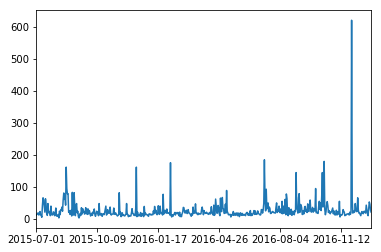

In [113]:
mydata.plot()

In [114]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [115]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [116]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(mydata)

/Users/frank/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/frank/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


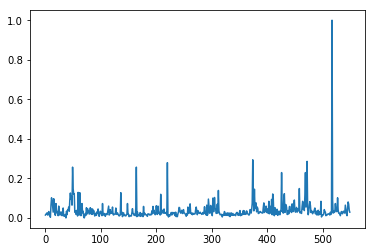

In [117]:
plt.plot(range(len(dataset)), dataset)

In [120]:
## here, I assume we have two hyperparameters: look_back 120 and num_predict 60

In [121]:
## maybe first clustering, and do LSTM for different clusters

In [183]:
## 我暂时觉得这样是可以的

# Keras LSTM Exploration

## Version 0

In [188]:
## Version 0:
## from website: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
## this is the example code for LSTM time series prediction
## split a time series into multiple lines (instances)
## here everytime just predict 1 value
## batch size is 1
## look_back is 1
## I just use train.iloc[0, :-49] to test
## code commented out, just for backup here

In [217]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# train = pd.read_csv("train_1.csv", nrows = 1)
# mydata = train.iloc[0, -49:]
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(mydata)
# dataset = dataset.reshape(-1, 1)

# # split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# print(len(train), len(test))

# # convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return numpy.array(dataX), numpy.array(dataY)

# # reshape into X=t and Y=t+1
# look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

# # reshape input to be [samples, time steps, features]
# trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

## Version 1

In [187]:
## Version 1: 
## data source from only one line: use 120 look_back and 60 num_predict
## use *mape* as loss function
## 300 epochs, 20 batch size, seems converge

In [ ]:
## The original mape function definition is here:
## from: https://github.com/fchollet/keras/blob/master/keras/losses.py

# def mean_absolute_percentage_error(y_true, y_pred):
#     diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
#                                             K.epsilon(),
#                                             None))
#     return 100. * K.mean(diff, axis=-1)

In [252]:
## assuming we filling na with 0.0, so we do not have nan anymore, do not need to consider the case when averaging
## define smape function as loss function to make more sense

In [253]:
from keras import backend as K

def smape(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true) + K.abs(y_pred),
                                            K.epsilon(),
                                            None))
    return 200. * K.mean(diff, axis=-1)

In [251]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv("train_1.csv", nrows = 1)
mydata = train.iloc[0, 1:]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(mydata)

dataset = dataset.reshape(-1, 1)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1, num_predict=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-num_predict):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back: i + look_back + num_predict, 0])
	return numpy.array(dataX), numpy.array(dataY)


# reshape into X=t and Y=t+1
look_back = 120
num_predict = 60
trainX, trainY = create_dataset(train, look_back, num_predict)
testX, testY = create_dataset(test, look_back, num_predict)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))
model.add(Dense(num_predict))
# model.compile(loss='mean_absolute_error', optimizer='adam')
# model.compile(loss='mean_absolute_percentage_error', optimizer='adam')
model.compile(loss=smape, optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=20, verbose=2, validation_data=(testX, testY))

/Users/frank/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/frank/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


368 182
Train on 188 samples, validate on 2 samples
Epoch 1/300
1s - loss: 141.9188 - val_loss: 107.7159
Epoch 2/300
0s - loss: 89.1541 - val_loss: 66.1716
Epoch 3/300
0s - loss: 61.3367 - val_loss: 51.1008
Epoch 4/300
0s - loss: 54.4066 - val_loss: 48.9824
Epoch 5/300
0s - loss: 53.3121 - val_loss: 49.2880
Epoch 6/300
0s - loss: 52.7995 - val_loss: 49.1670
Epoch 7/300
0s - loss: 52.3081 - val_loss: 48.9163
Epoch 8/300
0s - loss: 51.8473 - val_loss: 48.7453
Epoch 9/300
0s - loss: 51.4299 - val_loss: 48.8251
Epoch 10/300
0s - loss: 51.1064 - val_loss: 48.7249
Epoch 11/300
0s - loss: 50.8114 - val_loss: 48.9583
Epoch 12/300
0s - loss: 50.5732 - val_loss: 48.9559
Epoch 13/300
0s - loss: 50.3398 - val_loss: 48.8787
Epoch 14/300
0s - loss: 50.1041 - val_loss: 48.8108
Epoch 15/300
0s - loss: 49.9269 - val_loss: 48.7199
Epoch 16/300
0s - loss: 49.7424 - val_loss: 48.7566
Epoch 17/300
0s - loss: 49.5638 - val_loss: 48.9933
Epoch 18/300
0s - loss: 49.4462 - val_loss: 48.9952
Epoch 19/300
0s - l

0s - loss: 42.8343 - val_loss: 49.7567
Epoch 161/300
0s - loss: 42.8833 - val_loss: 50.0420
Epoch 162/300
0s - loss: 42.8228 - val_loss: 50.1021
Epoch 163/300
0s - loss: 42.8023 - val_loss: 49.8327
Epoch 164/300
0s - loss: 42.7805 - val_loss: 50.0461
Epoch 165/300
0s - loss: 42.7371 - val_loss: 49.8793
Epoch 166/300
0s - loss: 42.7163 - val_loss: 49.8084
Epoch 167/300
0s - loss: 42.7086 - val_loss: 50.0097
Epoch 168/300
0s - loss: 42.6633 - val_loss: 50.1175
Epoch 169/300
0s - loss: 42.6354 - val_loss: 50.1581
Epoch 170/300
0s - loss: 42.6207 - val_loss: 49.3808
Epoch 171/300
0s - loss: 42.6471 - val_loss: 50.0731
Epoch 172/300
0s - loss: 42.5349 - val_loss: 49.8972
Epoch 173/300
0s - loss: 42.5546 - val_loss: 49.7759
Epoch 174/300
0s - loss: 42.5400 - val_loss: 50.1015
Epoch 175/300
0s - loss: 42.5194 - val_loss: 49.9235
Epoch 176/300
0s - loss: 42.5500 - val_loss: 49.7124
Epoch 177/300
0s - loss: 42.5693 - val_loss: 50.2664
Epoch 178/300
0s - loss: 42.5013 - val_loss: 49.9473
Epoch 1

### following are the plot for prediction for both training and test set 

In [219]:
test_preds = model.predict(testX)
train_preds = model.predict(trainX)

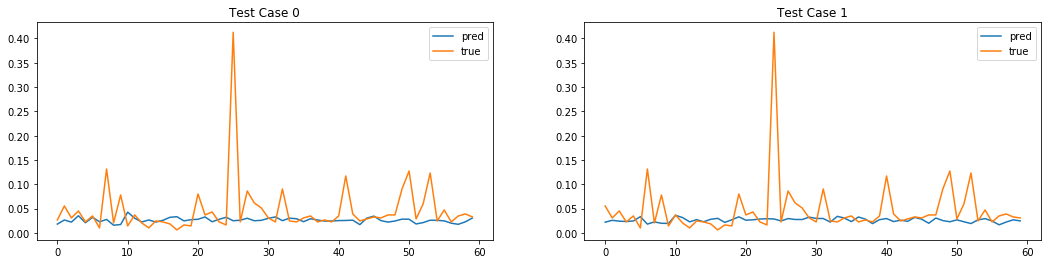

In [220]:
l = len(testY[0])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4))
ax1.plot(range(l), test_preds[0], label = 'pred')
ax1.plot(range(l), testY[0], label = 'true')
ax1.legend()
ax1.set_title("Test Case 0")

ax2.plot(range(l), test_preds[1], label = 'pred')
ax2.plot(range(l), testY[1], label = 'true')
ax2.legend()
ax2.set_title("Test Case 1")

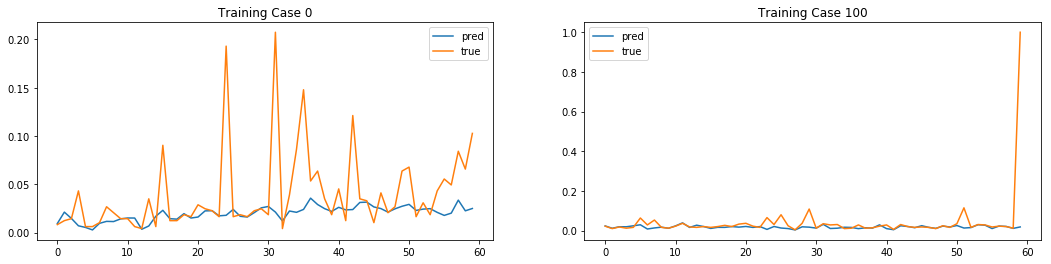

In [221]:
l = len(trainY[0])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4))
ax1.plot(range(l), train_preds[0], label = 'pred')
ax1.plot(range(l), trainY[0], label = 'true')
ax1.legend()
ax1.set_title("Training Case 0")

ax2.plot(range(l), train_preds[100], label = 'pred')
ax2.plot(range(l), trainY[100], label = 'true')
ax2.legend()
ax2.set_title("Training Case 100")

## Version 2

In [222]:
## version 2
## try to fetch source data from multiple lines 
## lets try first 3 lines from training set first!
## fillna to 0.1
## use a new *create_dataset* function here

In [265]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv("train_1.csv", nrows = 1000)
train = train.fillna(0.0)
mydata = train.iloc[:1000, 1:]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(mydata)

# dataset = dataset.reshape(-1, 1)

# split into train and test sets
train_size = int(dataset.shape[1] * 0.67)
test_size = dataset.shape[1] - train_size

## modify data split here!!!
## not split rows now, split columns to train and test here!!!
train, test = dataset[:, 0:train_size], dataset[:, train_size:dataset.shape[1]]


# convert an array of values into a dataset matrix
def create_dataset_each_row(dataset, look_back=1, num_predict=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-num_predict):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back: i + look_back + num_predict, 0])
	return numpy.array(dataX), numpy.array(dataY)

def create_dataset(dataset, look_back=1, num_predict= 1):
    nrows = dataset.shape[0]
    all_x, all_y = [], []
    
    for i in range(nrows):
        rowdata = dataset[i]
        x, y = create_dataset_each_row(rowdata.reshape(-1, 1), look_back, num_predict)
        all_x.append(x)
        all_y.append(y)
    all_x = np.vstack(all_x)
    all_y = np.vstack(all_y)
    
    return all_x, all_y
    
# reshape into X=t and Y=t+1
look_back = 120
num_predict = 60
trainX, trainY = create_dataset(train, look_back, num_predict)
testX, testY = create_dataset(test, look_back, num_predict)

print (trainX.shape, trainY.shape)
print (testX.shape, testY.shape)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))
model.add(Dense(num_predict))
# model.compile(loss='mean_absolute_error', optimizer='adam')
model.compile(loss=smape, optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=128, verbose=2, validation_data=(testX, testY))

(188000, 120) (188000, 60)
(2000, 120) (2000, 60)
Train on 188000 samples, validate on 2000 samples
Epoch 1/300
10s - loss: 85.8756 - val_loss: 85.7947
Epoch 2/300
8s - loss: 117.0335 - val_loss: 120.0689
Epoch 3/300
8s - loss: 135.6706 - val_loss: 135.8130
Epoch 4/300
8s - loss: 149.3035 - val_loss: 137.3732
Epoch 5/300
8s - loss: 147.3837 - val_loss: 139.9215
Epoch 6/300
8s - loss: 152.7998 - val_loss: 150.6227
Epoch 7/300
8s - loss: 158.6779 - val_loss: 154.5251
Epoch 8/300
8s - loss: 164.9796 - val_loss: 159.8373
Epoch 9/300


KeyboardInterrupt: 

In [271]:
trainX.reshape(188000, 120).sum(axis=1).min()

0.0

In [285]:
mask = ((trainX.reshape(trainX.shape[0], trainX.shape[2]) == 0).sum(axis = 1)) < 60

In [288]:
trainX = trainX[mask]
trainY = trainY[mask]

In [289]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))
model.add(Dense(num_predict))
# model.compile(loss='mean_absolute_error', optimizer='adam')
model.compile(loss=smape, optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=64, verbose=2, validation_data=(testX, testY))

Train on 178046 samples, validate on 2000 samples
Epoch 1/300
16s - loss: 66.1698 - val_loss: 54.7447
Epoch 2/300
16s - loss: 66.2773 - val_loss: 58.2494
Epoch 3/300
15s - loss: 66.8552 - val_loss: 58.0268
Epoch 4/300
14s - loss: 65.5771 - val_loss: 56.9911
Epoch 5/300
15s - loss: 67.1402 - val_loss: 60.2642
Epoch 6/300
15s - loss: 69.9435 - val_loss: 60.5056
Epoch 7/300


KeyboardInterrupt: 

In [284]:
trainY[:1000][mask].shape

(812, 60)

In [166]:
train.shape, test.shape

((368, 1), (182, 1))

In [167]:
trainX.shape, trainY.shape

((188, 1, 120), (188, 60))

In [168]:
testX.shape

(2, 1, 120)

In [171]:
testY

array([[ 0.0355412 ,  0.0177706 ,  0.01453958,  0.01938611,  0.03877221,
         0.01453958,  0.03069467,  0.01938611,  0.01938611,  0.08400646,
         0.00484653,  0.01292407,  0.01615509,  0.01453958,  0.01938611,
         0.04200323,  0.03392569,  0.02907916,  0.01130856,  0.01615509,
         0.01453958,  0.01938611,  0.01938611,  0.02100162,  0.02100162,
         0.01453958,  0.02907916,  0.0177706 ,  0.02746365,  1.        ,
         0.08885299,  0.02423263,  0.03392569,  0.02746365,  0.03069467,
         0.0726979 ,  0.04200323,  0.03231018,  0.03231018,  0.10177706,
         0.04038772,  0.02423263,  0.02423263,  0.0177706 ,  0.01130856,
         0.02584814,  0.03231018,  0.02423263,  0.02100162,  0.03231018,
         0.03392569,  0.02746365,  0.02423263,  0.06462036,  0.04200323,
         0.02100162,  0.01130856,  0.04523425,  0.08077544,  0.06946688],
       [ 0.0177706 ,  0.01453958,  0.01938611,  0.03877221,  0.01453958,
         0.03069467,  0.01938611,  0.01938611,  0.

In [172]:
train_pred.shape

(188, 60)

In [173]:
trainY.shape

(188, 60)

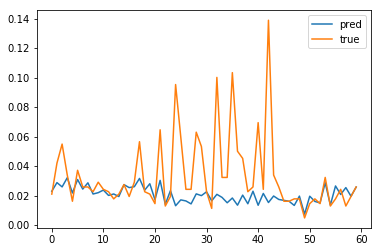

In [179]:
i = 150
l = len(trainY[i])
plt.figure()
plt.plot(range(l), train_pred[i], label = "pred")
plt.plot(range(l), trainY[i], label = "true")
plt.legend()



In [74]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.05 MAE
Test Score: 0.02 MAE


In [108]:
model.predict(testX)

array([[ 0.0133135 ,  0.01538167,  0.01476252],
       [ 0.01371677,  0.01715751,  0.01410278],
       [ 0.01263445,  0.01790794,  0.01249037],
       [ 0.01246745,  0.01611436,  0.01355991],
       [ 0.01377504,  0.01569158,  0.01424837],
       [ 0.01374245,  0.01962716,  0.01237894],
       [ 0.01088904,  0.01875201,  0.01050295],
       [ 0.01230988,  0.01196587,  0.01674934],
       [ 0.01533382,  0.01309966,  0.01895615]], dtype=float32)

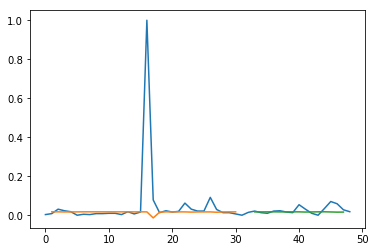

In [75]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [63]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
# dataset = dataframe.values
# dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: Error when checking input: expected lstm_4_input to have shape (None, 3, 1) but got array with shape (28, 1, 3)

In [ ]:
##  RNN Ideas:
one RNN for for each timeseries looks like a nonsense.
RNN usually trained by batches, one batch = many parallel timeseries, I don't see a problem here.
1 epoch ~ 2-3min (training + validation) on my model. But it's far from "out of the box" RNN, I put a lot of effort into optimization. And even this time is not fast enough, I still struggling with a hyperparameter search.
10-15 epochs using early stopping. 
128 as batch size, The smaller sizes give slightly better results, but I trade precision for calculation time

Did you had to normalize the RNN sequence with mean 0 and sd 0.1?
From this point of view, NaN's don't have any 'business meaning' and can be safely replaced by zeros.

The real power of RNN's is that you can build generative model, and predict all 60 days at once.

No one uses relu in recurrent (or similar autoregressive structure) networks, it explodes quickly. Usual activation in this case is tanh(), it's bounded.

mae and mse are bad loss functions for this competition. mape is a better choice, closer to smape.

In [ ]:
I'm running a single xgboost model for all pages, not one model per page.

In [76]:
testX

array([[[ 0.01470588]],

       [[ 0.02124183]],

       [[ 0.0130719 ]],

       [[ 0.00980392]],

       [[ 0.02124183]],

       [[ 0.02287582]],

       [[ 0.01633987]],

       [[ 0.0130719 ]],

       [[ 0.05392157]],

       [[ 0.03104575]],

       [[ 0.00980392]],

       [[ 0.        ]],

       [[ 0.03431373]],

       [[ 0.07026144]],

       [[ 0.05882353]]])

In [3]:
## try StandardScaler

In [24]:
train = pd.read_csv("train_1.csv")

In [44]:
train = train.fillna(0.0)

In [38]:
train.shape

(145063, 551)

In [51]:
df = train.iloc[:, 1:].values.T

In [52]:
df.shape

(550, 145063)

In [54]:
df = scaler.fit_transform(df)

In [56]:
df.shape.T

AttributeError: 'tuple' object has no attribute 'T'

In [49]:
scaler.inverse_transform(scaler.transform(df))

array([[ 18.,  11.,   1., ...,   0.,   3.,   0.],
       [ 11.,  14.,   0., ...,   0.,   9.,   0.],
       [  5.,  15.,   1., ...,   0.,  12.,   0.],
       ..., 
       [ 19.,  45.,   3., ...,   8.,  23.,   8.],
       [ 18.,  26.,   4., ...,   5.,   4.,  27.],
       [ 20.,  20.,  17., ...,   4.,  14.,   7.]])

In [41]:
from sklearn.preprocessing import StandardScaler

In [33]:
aa = np.zeros(100)

In [36]:
aa[0] = 1

In [37]:
scaler.fit_transform(aa.reshape(-1, 1))

array([[ 9.94987437],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0.10050378],
       [-0

In [21]:
scaler = StandardScaler()

In [23]:
train = train.fillna(0.0)

In [ ]:
vv = train.iloc[:, 1:].values

In [6]:
train.shape

(1000, 551)

In [12]:
train = train.fillna(0.0)

In [17]:
scaler.fit_transform(train.iloc[:100, 1:].values.T)

array([[-0.12792399, -0.42389021, -0.31152705, ..., -0.32260674,
        -1.06600985, -0.29117174],
       [-0.36631091, -0.33553512, -0.385636  , ..., -0.32260674,
        -0.5753777 , -0.29117174],
       [-0.57064256, -0.30608343, -0.31152705, ..., -0.32260674,
        -0.33006163, -0.29117174],
       ..., 
       [-0.09386872,  0.57746741, -0.16330917, ...,  0.03208333,
         0.56943064,  0.45066709],
       [-0.12792399,  0.01788521, -0.08920022, ..., -0.10092545,
        -0.98423782,  2.21253434],
       [-0.05981345, -0.15882496,  0.87421606, ..., -0.14526171,
        -0.16651758,  0.35793724]])

In [18]:
scaler.scale_

array([  29.36402724,   33.9539038 ,   13.49364785,   19.31953056,
         17.30727225,   15.66033269,   14.96438759,   50.61011352,
         21.10501754,    9.28273969,   29.19152487,   14.23590165,
          3.3346783 ,   50.18856331,   58.45586313,   39.52847468,
         42.03221358,    5.0120727 ,   31.81630337,   11.44120088,
         23.94883175,   31.28096382,   29.59809157,   13.67022463,
         91.52631986,   12.27417042,   37.06827959,   18.81941638,
         18.94263493,    5.01575205,   13.3302931 ,    5.48004826,
          7.24404001,   64.560407  ,   38.48697468,   69.7876856 ,
          8.85571935,   14.82360592,   77.4101153 ,    5.62754178,
         48.59167415,   42.83209332,   11.56660968,   13.40450757,
         28.30696343,   16.04898658,    5.84634689,   31.32142699,
          8.91739298,   16.1290699 ,    9.91190219,   13.96443523,
         73.37756596,  119.98268035,    0.67567903,    0.3899947 ,
         10.52727916,   20.0175523 ,    5.20079333,   99.98698